In [ ]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
#import tensorflow as tf
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

#import tensorflow as tf
#devices= tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(devices[0], True)

In [ ]:
tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
tf.__version__

In [ ]:
import matplotlib.pylab as plt
#!pip install netCDF4
#!pip install -U matplotlib==3.2
#!pip uninstall -y numpy
#!pip install numpy
#!pip install pyproj==1.9.6
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install sdv
from netCDF4 import Dataset, num2date
import pandas as pd
#from matplotlib.cbook import dedent
#from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
import xarray
import netCDF4 as nc
#conda install xarray or pip install xarray

In [ ]:
import xarray as xr
sst_dataset=xr.open_dataset('sst_east_sea_month_198311.nc')

In [ ]:
#dataset_sst_lp=sst_dataset.sst.sel(lon=114.125,lat=14.125, method='nearest',time='1993-03-01')
#dataset_sst_lp
#dataset_sst_lp.plot()

import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import numpy as np
month=['01','02','03','04','05','06','07','08','09','10','11','12']
for year in range (1982,1984):
        for mo in month:
            sst_nc_file ='sst_merge_month_'+str(year)+mo+'.nc'
            print(sst_nc_file)
            sst_dataset=xr.open_dataset(sst_nc_file)
            #sst_dataset
            dataset_sst=sst_dataset.sst
            dataset_sst_lp = sst_dataset.sst.sel(lon=slice(125, 140), lat=slice(30, 45))
            output_file='sst_east_sea_month_'+str(year)+mo+'.nc'
            print(output_file)
            dataset_sst_lp.to_netcdf(output_file)
            #dataset_sst_lp.plot()
        dataset_sst_lp.plot(col="time",col_wrap=6)

In [ ]:
df_sst=dataset_sst_lp.to_dataframe()
np_sst=df_sst.to_numpy()
print(np_sst.shape)
print(np_sst)
#sst_numpy_array = np.stack([data_array.values for data_array in df_sst['sst'].values])

In [ ]:
type(dataset_sst_lp)

In [ ]:
dataset_sst_lp

In [ ]:
df_sst

In [ ]:
import pandas as pd
df_sst.to_csv('sst.csv')
df_sst=pd.read_csv('sst.csv')
df_sst[['lat','lon']]

In [ ]:
for x, y in zip (df_sst['lon'], df_sst['lat']):
  print(x,y)

In [ ]:
print(sst_dataset.sst.sel(time='1983-12-31').values)

In [ ]:
df_sst_point=(df_sst.dropna())[['lat','lon','sst']]
station_point=pd.read_excel('/gpu_deep/Deep_Ocean/station_104_107_loc.xls',header=0)
print(station_point)
print(station_point.shape)

df_station_point=station_point[['latitude','longitude']]
print(df_station_point)
df_station_point_38=station_point[(df_station_point['latitude']<38) & (df_station_point['longitude']>130)]

print(df_station_point_38)

#conda install xlrd

In [ ]:
lst = [0, 1, 2]
num_ls=[num for num in lst if num != 0]

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TF to use only the CPU

#plot obs station
df_sst_point=(df_sst.dropna())[['lat','lon','sst']]
station_point=pd.read_excel('/gpu_deep/Deep_Ocean/AVHRR/station_104_107_loc.xls',header=0)
print(station_point)




df_station_point=station_point[['Point','latitude','longitude']]


print(df_station_point)
print(df_station_point[['latitude']])

df_station_point_38=station_point[(df_station_point['latitude']<39) & (df_station_point['longitude']>129.8) & (df_station_point['longitude']<132)]


lat_ls=df_station_point_38[['latitude']].values.flatten()
lon_ls=df_station_point_38[['longitude']].values.flatten()


# Read Temperature Profile

import glob
from pandas import DataFrame
import pandas as pd
col_names=['AREA','Station','Point','Station-Point','Latitude','Longitude','DATE','DEPTH','TEMPERATURE','TEMP/QC','SALINITY','SALINITY/QC','DISOLVED-OXYGEN','DISOLVED-OXYGEN/QC','QC Level','PHOROSPATE',' nitrite nitrogen','nitric acid nitrogen','silicic acid silicon','pH','Transparency','Pressure','Ship']

path = '/gpu_deep/Deep_Ocean/obs_east/obs_*_east.xls'

df=pd.DataFrame()

files=glob.glob(path)
for file in sorted(files):
    with open(file, 'r') as f:
        #print(file[30:43])
        Name=file[30:43]
        #print(Name)
        statement='/gpu_deep/Deep_Ocean/obs_east/'+ Name + '.xls'
        print(statement)
#        pd.read_excel('/content/drive/My Drive/Deep_Ocean/obs_east/obs_1965_east.xls', header=1,names=col_names)
        df=df.append(pd.read_excel(statement, header=1,names=col_names))

station_point=pd.read_excel('/gpu_deep/Deep_Ocean/AVHRR/station_104_107_loc.xls',header=0)
print(station_point)
print(station_point.shape)

df_station_point=station_point[['Point','latitude','longitude']]

df_station_point_38=station_point[(df_station_point['latitude']<39) & (df_station_point['longitude']>129.8) & (df_station_point['longitude']<132)]

print(df_station_point_38)

df_station_point=df_station_point_38['Point'].to_list()

print(df_station_point)

df_38=pd.DataFrame()

print("------------------------DF_STATION_POINT_38----------------------------------------------")
for i in df_station_point:
    #print(df[df["Station-Point"]==i])
    print(i)
    df_38=df_38.append(df[df["Station-Point"]==i])

#print(df)
temp=df_38
print(temp)



import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
#ocean_df=temp[['DATE','Station','Point','Station-Point','Latitude','Longitude','DEPTH','TEMPERATURE','SALINITY']]
ocean_df=temp[['DATE','Station-Point','DEPTH','TEMPERATURE']]
ocean_df['DATE']=pd.to_datetime(ocean_df['DATE'],format='%Y-%m-%d %H:%M')
#ocean_df['DATE']=ocean_df['DATE'].dt.strftime('%Y-%m-%d')
#ocean_df['DATE']=ocean_df['DATE'].dt.strftime('%Y-%m')
ocean_df['DATE']=ocean_df['DATE'].dt.strftime('%Y-%m-%d')

#select Feb
#ocean_df=ocean_df[ocean_df['DATE'].str.contains("-02|-03|-04|-06")]
ocean_df=ocean_df[ocean_df['DATE'].str.contains("-02-|-03-")]

print(ocean_df)


#ocean_df.pivot(index=['DATE','Station-Point'],columns='DEPTH',values='TEMPERATURE')

ocean_grouped = ocean_df["DATE"].unique()

#np.unique(ocean_df[['DATE', 'Station-Point']].values)

#print(np.unique(ocean_df[['DATE', 'Station-Point']].values))



##2중 Loop
reshape_ocean_df = pd.DataFrame(columns=['DATE','Station-Point','Latitude','Longitude','0','10','20','30','50','75','100','125','150','200','250','300','400','500'])

obs_station= ocean_df["Station-Point"].unique()

#depth_criteria=[0,10,25,50,100,200,250,300,400,500]

depth_criteria=[0,10,20,30,50,75,100,125,150,200,250,300,400,500]
print(obs_station)

#DEPTH=ocean_df_temp['DEPTH'][ocean_df_temp["DATE"]==i].to_list()


#tempDf = pd.DataFrame(columns=['PRODUCT','CAT_ID','MARKET_ID'])
#tempDf['PRODUCT'] = df['PRODUCT']
#tempDf['CAT_ID'] = catid
#tempDf['MARKET_ID'] = 13

#finalDf = pd.concat([finalDf,tempDf])

temp_df = pd.DataFrame(columns=['DATE','Station-Point','Latitude','Longitude','0','10','20','30','50','75','100','125','150','200','250','300','400','500'])


df_station_point=station_point[['Point','latitude','longitude']]

df_station_point=pd.DataFrame(df_station_point)


print("--------DF Station Point-------")

print(df_station_point)

from datetime import date
#f_date = date(2014, 7, 2)
#l_date = date(2014, 7, 11)
#delta = l_date - f_date
#print(delta.days)

for i in obs_station :
        obs_station_date=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]>'1992-01-01') & (ocean_df["DATE"]<'2019-01-01'), "DATE"].unique()
        print(obs_station_date)
        for j in obs_station_date :
                    DEPTH=ocean_df['DEPTH'][(ocean_df["DATE"]==j) & (ocean_df["Station-Point"]==i)].to_list()
                    DEPTH.sort()
                    if DEPTH==depth_criteria:
                        print(j,i)
                        start_dt=date(int(j[0:4]),1,1)
                        print(j[5:7], j[8:10])
                        end_dt=date(int(j[0:4]),int(j[5:7]), int(j[8:10]))
                        delta=end_dt-start_dt
                        ssh_days=delta.days
                        obs_lat=df_station_point.loc[(df_station_point['Point']==i),"latitude"].values
                        obs_lon=df_station_point.loc[(df_station_point['Point']==i),"longitude"].values
                        print("LAT,LON:",obs_lat,obs_lon)
                        #sst_nc_file ='/gpu_deep/Deep_Ocean/CMEMS/cmems_ssh_east_sea_point_'+str(j[0:4])+'.nc'
                        sst_nc_file ='/gpu_deep/Deep_Ocean/CMEMS/cmems_adt_east_sea_point_'+str(j[0:4])+'.nc'
                        print(sst_nc_file)
                        ssh_dataset=xr.open_dataset(sst_nc_file)
                        print(ssh_dataset)
                        #dataset_ssh=ssh_dataset.sla
                        dataset_ssh=ssh_dataset.adt
                        #dataset_ssh_lp = ssh_dataset.sla.sel(longitude=slice(120, 140), latitude=slice(30, 40))
                        dataset_ssh_lp = ssh_dataset.adt.sel(time=j, latitude=obs_lat, longitude=obs_lon, method="nearest")
                        print("SSH:", dataset_ssh_lp)
                        #output_file='/gpu_deep/Deep_Ocean/CMEMS/cmems_ssh_east_sea_point_'+str(year)+'.nc'
                        #print(output_file)
                        #dataset_ssh_lp.to_netcdf(output_file)                                                
                        temp_df["DATE"]=j
                        temp_df["Station-Point"]=i
                        temp_df["Latitude"]=obs_lat
                        temp_df["Longitude"]=obs_lon
                        temp_df["SSH"]=dataset_ssh_lp.values
                        temp_df["0"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==0),"TEMPERATURE"].values 
                        temp_df["10"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==10),"TEMPERATURE"].values
                        temp_df["20"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==20),"TEMPERATURE"].values
                        temp_df["30"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==30),"TEMPERATURE"].values
                        temp_df["50"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==50),"TEMPERATURE"].values
                        temp_df["75"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==75),"TEMPERATURE"].values
                        temp_df["100"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==100),"TEMPERATURE"].values
                        temp_df["125"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==125),"TEMPERATURE"].values
                        temp_df["150"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==150),"TEMPERATURE"].values
                        temp_df["200"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==200),"TEMPERATURE"].values
                        temp_df["250"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==250),"TEMPERATURE"].values
                        temp_df["300"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==300),"TEMPERATURE"].values
                        temp_df["400"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==400),"TEMPERATURE"].values
                        temp_df["500"]=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==500),"TEMPERATURE"].values
                        print(temp_df)
                        reshape_ocean_df=pd.concat([reshape_ocean_df,temp_df])
                        
print(reshape_ocean_df[reshape_ocean_df['DATE']!=reshape_ocean_df['DATE']])

reshape_ocean_df.reset_index()
                        
                        
#                    for k in depth_criteria:
#                        if DEPTH==depth_criteria:
#                            temp_depth=ocean_df.loc[(ocean_df["Station-Point"]==i) & (ocean_df["DATE"]==j) & (ocean_df["DEPTH"]==k)]
#                            print(temp_depth)
#                            #print(i,j,k,temp_depth)
                    

print(reshape_ocean_df)

reshape_ocean_df.to_csv('reshape_ocean_df.csv',index=False)

reshape_ocean_df=pd.read_csv('reshape_ocean_df.csv')  

pd.set_option('display.max_rows', None) 
print(reshape_ocean_df.drop([0,0]))


reshape_ocean_df_1993=reshape_ocean_df[reshape_ocean_df["DATE"]>'1993-01-01']

reshape_ocean_df_1993.reset_index(drop=True,inplace=True)

print(reshape_ocean_df_1993)

#ls_ocean_dt=ocean_df['DATE'].unique()
ls_station_df=ocean_df['Station-Point'].unique()
print(ls_station_df.shape)
obs_station_lst=ls_station_df.tolist()
print(obs_station_lst)





import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import dedent
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(32, 32))
#m = Basemap(projection='lcc', resolution='f',
#            width=1E6, height=1E6, 
#            lat_0=37, lon_0=132,)
#m.etopo(scale=0.5, alpha=0.5)
m = Basemap(projection='lcc', resolution='f',
          lat_0=37, lon_0=132, 
          llcrnrlon=120.25, llcrnrlat=30.0,
          urcrnrlon=140.25, urcrnrlat=40.75)
m.etopo(scale=3.0, alpha=2.0)


lons, lats = m(lon_ls, lat_ls)
#m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
m.plot(lons,lats,'ro',markersize=18)
plt.show()

# Map (long, lat) to (x, y) for plotting
#x, y = m(132, 37)
#plt.plot(x, y, 'ok', markersize=10)
#plt.text(x, y, ' Seoul', fontsize=12);

#m.scatter(lon, lat, marker = 'o', color='r', zorder=5)

#m.scatter(lon, lat, latlon=True,
#          c=np.log10(population), s=area,
#          cmap='Reds', alpha=0.5)

In [ ]:
import matplotlib.pyplot as plt

# define data

Oxygen = [ 0.1 , 0.5, 1, 10, 15, 20, 15, 10, 1, 0.5, 0.5]
Depth  = [ 0,     1,  2,  4,  8, 10, 12, 14, 16, 20, 40 ]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(Oxygen, Depth, 'go--')
ax.xaxis.tick_top()

ax.set_ylabel('depth')
ax.set_ylim(50, 0)
ax.set_xlim(0, 25)
ax.set_xlabel('Oxygen level [ppm]')

plt.show()

In [ ]:
df_sst=dataset_sst_lp.to_dataframe()
np_sst=df_sst.to_numpy()
print(np_sst.shape)
print(np_sst)
#sst_numpy_array = np.stack([data_array.values for data_array in df_sst['sst'].values])

In [ ]:
import pandas as pd
reshape_ocean_df=pd.read_csv('reshape_ocean_df.csv')
reshape_ocean_df

In [ ]:
reshape_ocean_df_1993
reshape_ocean_df_1993_104_07=reshape_ocean_df_1993[reshape_ocean_df_1993['Station-Point']=='104-07']

In [ ]:
reshape_ocean_df_1993_104_07

In [ ]:
reshape_ocean_cnn=reshape_ocean_df[["DATE","Station-Point","SSH","0","10","20","30","50","75","100","125","150","200","250","300"]]

In [ ]:
reshape_ocean_cnn

In [ ]:
reshape_104_07_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='104-07']
reshape_104_08_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='104-08']
reshape_104_09_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='104-09']
reshape_104_10_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='104-10']
reshape_104_11_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='104-11']
reshape_105_07_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='105-07']
reshape_105_08_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='105-08']
reshape_105_09_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='105-09']
reshape_105_10_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='105-10']
reshape_105_11_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='105-11']
reshape_106_07_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='106-07']
reshape_106_08_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='106-08']
reshape_106_09_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='106-09']
reshape_106_10_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='106-10']
reshape_106_11_temp=reshape_ocean_cnn[reshape_ocean_cnn["Station-Point"]=='106-11']

In [ ]:
year_mon_104_07=reshape_104_07_temp["DATE"].str.slice(0,7)
year_mon_104_08=reshape_104_08_temp["DATE"].str.slice(0,7)
year_mon_104_09=reshape_104_09_temp["DATE"].str.slice(0,7)
year_mon_104_10=reshape_104_10_temp["DATE"].str.slice(0,7)
year_mon_104_11=reshape_104_11_temp["DATE"].str.slice(0,7)
year_mon_105_07=reshape_105_07_temp["DATE"].str.slice(0,7)
year_mon_105_08=reshape_105_08_temp["DATE"].str.slice(0,7)
year_mon_105_09=reshape_105_09_temp["DATE"].str.slice(0,7)
year_mon_105_10=reshape_105_10_temp["DATE"].str.slice(0,7)
year_mon_105_11=reshape_105_11_temp["DATE"].str.slice(0,7)
year_mon_106_07=reshape_106_07_temp["DATE"].str.slice(0,7)
year_mon_106_08=reshape_106_08_temp["DATE"].str.slice(0,7)
year_mon_106_09=reshape_106_09_temp["DATE"].str.slice(0,7)
year_mon_106_10=reshape_106_10_temp["DATE"].str.slice(0,7)
year_mon_106_11=reshape_106_11_temp["DATE"].str.slice(0,7)

In [ ]:
set_104_07=set(year_mon_104_07)
set_104_08=set(year_mon_104_08)
set_104_09=set(year_mon_104_09)
set_104_10=set(year_mon_104_10)
set_104_11=set(year_mon_104_11)

set_105_07=set(year_mon_105_07)
set_105_08=set(year_mon_105_08)
set_105_09=set(year_mon_105_09)
set_105_10=set(year_mon_105_10)
set_105_11=set(year_mon_105_11)

set_106_07=set(year_mon_106_07)
set_106_08=set(year_mon_106_08)
set_106_09=set(year_mon_106_09)
set_106_10=set(year_mon_106_10)
set_106_11=set(year_mon_106_11)

In [ ]:
set_104_08

In [ ]:
set_common_104=(set_104_07&set_104_08&set_104_09&set_104_10&set_104_11)
set_common_105=(set_105_07&set_105_08&set_105_09&set_105_10&set_105_11)
set_common_106=(set_106_07&set_106_08&set_106_09&set_106_10&set_106_11)
#set_common=set(set_common&set_104_09)

set_common=(set_common_104&set_common_105&set_common_106)

In [ ]:
year_mon=list(set_common)

In [ ]:
set_common

In [ ]:
import numpy as np
reshape_ocean_cnn.dropna()
type(reshape_ocean_cnn)
reshape_ocean_cnn=reshape_ocean_cnn.dropna()

In [ ]:
reshape_ocean_cnn

In [ ]:
reshape_ocean_cnn_common=pd.DataFrame()

for year in year_mon:
    reshape_ocean_cnn_temp=reshape_ocean_cnn[reshape_ocean_cnn["DATE"].str.contains(year)]
    reshape_ocean_cnn_common=pd.concat([reshape_ocean_cnn_temp,reshape_ocean_cnn_common])

    
pd.set_option('display.max_rows', None)

reshape_ocean_cnn_common.shape
reshape_ocean_cnn_common
reshape_ocean_cnn_common.to_csv('reshape_ocean_cnn_common.csv')

In [ ]:
depth_list=['10','20','30','50','75','100','125','150','200','250','300']
for depth in depth_list:
    print(depth)
    reshape_ocean_cnn_common=pd.DataFrame()
    reshape_ocean_cnn_temp=pd.DataFrame()
    for year in year_mon:
        print(year)
        reshape_ocean_cnn_temp['DATE']=year
        reshape_ocean_cnn_temp["104-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-07'),depth].values
        reshape_ocean_cnn_temp["104-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-08'),depth].values
        reshape_ocean_cnn_temp["104-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-09'),depth].values
        reshape_ocean_cnn_temp["104-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-10'),depth].values
        reshape_ocean_cnn_temp["104-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-11'),depth].values
        reshape_ocean_cnn_temp["105-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-07'),depth].values
        reshape_ocean_cnn_temp["105-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-08'),depth].values
        reshape_ocean_cnn_temp["105-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-09'),depth].values
        reshape_ocean_cnn_temp["105-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-10'),depth].values
        reshape_ocean_cnn_temp["105-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-11'),depth].values
        reshape_ocean_cnn_temp["106-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-07'),depth].values
        reshape_ocean_cnn_temp["106-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-08'),depth].values
        reshape_ocean_cnn_temp["106-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-09'),depth].values
        reshape_ocean_cnn_temp["106-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-10'),depth].values
        reshape_ocean_cnn_temp["106-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-11'),depth].values
        reshape_ocean_cnn_common=pd.concat([reshape_ocean_cnn_temp,reshape_ocean_cnn_common])
        #print(reshape_ocean_cnn_common)
    reshape_ocean_cnn_common.reset_index()
    #print(depth)
    reshape_ocean_cnn_common.to_csv('reshape_ocean_common_sub_'+depth+'.csv',index=False)
    reshape_ocean_cnn_common_sub=pd.read_csv('reshape_ocean_common_sub_'+depth+'.csv')
    reshape_ocean_cnn_common_sub=reshape_ocean_cnn_common_sub[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
    globals()['reshape_ocean_cnn_common_sub_'+depth]=reshape_ocean_cnn_common_sub.dropna()
    
reshape_ocean_cnn_common_sub_10

In [ ]:
reshape_ocean_cnn_common=pd.DataFrame()
reshape_ocean_cnn_temp=pd.DataFrame()
for year in year_mon:
    print(year)
    reshape_ocean_cnn_temp['DATE']=year
    reshape_ocean_cnn_temp["104-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-07'),"SSH"].values
    reshape_ocean_cnn_temp["104-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-08'),"SSH"].values
    reshape_ocean_cnn_temp["104-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-09'),"SSH"].values
    reshape_ocean_cnn_temp["104-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-10'),"SSH"].values
    reshape_ocean_cnn_temp["104-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-11'),"SSH"].values
    reshape_ocean_cnn_temp["105-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-07'),"SSH"].values
    reshape_ocean_cnn_temp["105-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-08'),"SSH"].values
    reshape_ocean_cnn_temp["105-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-09'),"SSH"].values
    reshape_ocean_cnn_temp["105-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-10'),"SSH"].values
    reshape_ocean_cnn_temp["105-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-11'),"SSH"].values
    reshape_ocean_cnn_temp["106-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-07'),"SSH"].values
    reshape_ocean_cnn_temp["106-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-08'),"SSH"].values
    reshape_ocean_cnn_temp["106-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-09'),"SSH"].values
    reshape_ocean_cnn_temp["106-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-10'),"SSH"].values
    reshape_ocean_cnn_temp["106-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-11'),"SSH"].values
    reshape_ocean_cnn_common=pd.concat([reshape_ocean_cnn_temp,reshape_ocean_cnn_common])
    print(reshape_ocean_cnn_common)

reshape_ocean_cnn_common.reset_index()
reshape_ocean_cnn_common.to_csv('reshape_ocean_common_ssh.csv',index=False)
reshape_ocean_cnn_common_ssh=pd.read_csv('reshape_ocean_common_ssh.csv')
reshape_ocean_cnn_common_ssh=reshape_ocean_cnn_common_ssh[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
globals()['reshape_ocean_cnn_common_ssh']=reshape_ocean_cnn_common_sub.dropna()
#reshape_ocean_cnn_common_ssh=reshape_ocean_cnn_common_ssh.dropna()
reshape_ocean_cnn_common_ssh
#reshape_ocean_cnn_common_ssh=reshape_ocean_cnn_common_ssh[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
#reshape_ocean_cnn_common_ssh

In [ ]:
from sdv.tabular import CopulaGAN
#model_upper = CopulaGAN(constraints=constraints_upper)
model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
model.fit(reshape_ocean_cnn_common_ssh)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
model.sample(1000, max_retries=1000000)

In [ ]:
reshape_ocean_cnn_common_sst=pd.DataFrame()
reshape_ocean_cnn_temp=pd.DataFrame()
for year in year_mon:
    reshape_ocean_cnn_temp["DATE"]=year
    reshape_ocean_cnn_temp["104-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-07'),"0"].values
    reshape_ocean_cnn_temp["104-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-08'),"0"].values
    reshape_ocean_cnn_temp["104-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-09'),"0"].values
    reshape_ocean_cnn_temp["104-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-10'),"0"].values
    reshape_ocean_cnn_temp["104-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='104-11'),"0"].values
    reshape_ocean_cnn_temp["105-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-07'),"0"].values
    reshape_ocean_cnn_temp["105-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-08'),"0"].values
    reshape_ocean_cnn_temp["105-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-09'),"0"].values
    reshape_ocean_cnn_temp["105-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-10'),"0"].values
    reshape_ocean_cnn_temp["105-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='105-11'),"0"].values
    reshape_ocean_cnn_temp["106-07"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-07'),"0"].values
    reshape_ocean_cnn_temp["106-08"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-08'),"0"].values
    reshape_ocean_cnn_temp["106-09"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-09'),"0"].values
    reshape_ocean_cnn_temp["106-10"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-10'),"0"].values
    reshape_ocean_cnn_temp["106-11"]=reshape_ocean_cnn.loc[(reshape_ocean_cnn["DATE"].str.contains(year)) & (reshape_ocean_cnn["Station-Point"]=='106-11'),"0"].values
    reshape_ocean_cnn_common_sst=pd.concat([reshape_ocean_cnn_temp,reshape_ocean_cnn_common_sst])
    #reshape_ocean_cnn_common_sst=pd.concat([reshape_ocean_cnn_temp,reshape_ocean_cnn_common_sst])

reshape_ocean_cnn_common_sst.reset_index()
reshape_ocean_cnn_common_sst.to_csv('reshape_ocean_cnn_common_sst.csv',index=False)
reshape_ocean_cnn_common_sst=pd.read_csv('reshape_ocean_cnn_common_sst.csv')
#reshape_ocean_cnn_common_sst=reshape_ocean_cnn_common_sst.dropna()
reshape_ocean_cnn_common_sst=reshape_ocean_cnn_common_sst[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
#reshape_ocean_cnn_common_sst
globals()['reshape_ocean_cnn_common_sst']=reshape_ocean_cnn_common_sst.dropna()
#reshape_ocean_cnn_common_sst=reshape_ocean_cnn_common_sst[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
reshape_ocean_cnn_common_sst
#reshape_ocean_cnn_common_sst=reshape_ocean_cnn_common_sst[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
reshape_ocean_cnn_common_sst
#reshape_ocean_cnn_common_sst['DATE','106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-8','104-09','104-10','104-11']

In [ ]:
reshape_ocean_cnn_common_sub_10

In [ ]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

reshape_ocean_cnn_sst_array=reshape_ocean_cnn_common_sst.to_numpy()
reshape_ocean_cnn_sst_array.shape
reshape_ocean_cnn_sst_array.reshape(11,3,5)

reshape_ocean_cnn_ssh_array=reshape_ocean_cnn_common_ssh.to_numpy()
reshape_ocean_cnn_ssh_array.shape
reshape_ocean_cnn_ssh_array.reshape(11,3,5)


reshape_ocean_cnn_sub_10_array=reshape_ocean_cnn_common_sub_10.to_numpy()
reshape_ocean_cnn_sub_10_array.shape
reshape_ocean_cnn_sub_10_array.reshape(11,3,5)


reshape_ocean_cnn_sub_250_array=reshape_ocean_cnn_common_sub_250.to_numpy()
reshape_ocean_cnn_sub_250_array.shape
reshape_ocean_cnn_sub_250_array.reshape(11,3,5)

In [ ]:
import numpy as np
from keras.layers import Input, Conv2D
from keras.models import Model

#red   = np.array([1]*9).reshape((3,3))
#green = np.array([100]*9).reshape((3,3))
#blue  = np.array([10000]*9).reshape((3,3))

inputs = Input((2,5,3))
conv = Conv2D(filters=1, 
              strides=1, 
              padding='valid', 
              activation='relu',
              kernel_size=2, 
              kernel_initializer='ones', 
              bias_initializer='zeros', )(inputs)
model = Model(inputs,conv)


In [ ]:
from sdv.constraints import GreaterThan
depth_temp_0_10_const = GreaterThan(
low='10',
high='0',
handling_strategy='reject_sampling')
#0	10	20	30	50	75	100	125	150	200	250	300	400	500
depth_temp_20_10_const = GreaterThan(
low='20',
high='10',
handling_strategy='reject_sampling')

depth_temp_30_20_const = GreaterThan(
low='30',
high='20',
handling_strategy='reject_sampling')

depth_temp_50_30_const = GreaterThan(
low='50',
high='30',
handling_strategy='reject_sampling')

depth_temp_75_50_const = GreaterThan(
low='75',
high='50',
handling_strategy='reject_sampling')

depth_temp_100_75_const = GreaterThan(
low='100',
high='75',
handling_strategy='reject_sampling')

depth_temp_125_100_const = GreaterThan(
low='125',
high='100',
handling_strategy='reject_sampling')

depth_temp_150_125_const = GreaterThan(
low='150',
high='125',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


depth_temp_250_200_const = GreaterThan(
low='250',
high='200',
handling_strategy='reject_sampling')

depth_temp_300_250_const = GreaterThan(
low='300',
high='250',
handling_strategy='reject_sampling')

depth_temp_400_300_const = GreaterThan(
low='400',
high='300',
handling_strategy='reject_sampling')

depth_temp_500_400_const = GreaterThan(
low='500',
high='400',
handling_strategy='reject_sampling')

constraints_upper = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const,
                     depth_temp_400_300_const,
                     depth_temp_500_400_const]

constraints_upper2 = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const]

In [ ]:
reshape_ocean_cnn_common_sst

In [ ]:
reshape_ocean_cnn_common_sub_20

In [ ]:
reshape_ocean_cnn

In [ ]:
reshape_ocean_cnn_104_07=reshape_ocean_cnn[reshape_ocean_cnn['Station-Point']=='104-07']
reshape_ocean_cnn_104_07

In [ ]:
from sdv.tabular import GaussianCopula
model = GaussianCopula(constraints=constraints_upper2)
model.fit(reshape_ocean_cnn)
model_ctn_output = model.sample(1000, max_retries=1000000)

from sdv.tabular import TVAE
model = TVAE(constraints=constraints_upper2,cuda=True)
model.fit(reshape_ocean_cnn_104_07)
model_ctn_output2 = model.sample(1000, max_retries=1000000)

In [ ]:
model_ctn_output=model_ctn_output.reset_index(drop=True)
model_ctn_output2=model_ctn_output2.reset_index(drop=True)

In [ ]:
model_ctn_output

In [ ]:
model_ctn_output.compare(model_ctn_output2)

In [ ]:
reshape_104_07_temp=model_ctn_output[model_ctn_output["Station-Point"]=='104-07']
reshape_104_08_temp=model_ctn_output[model_ctn_output["Station-Point"]=='104-08']
reshape_104_09_temp=model_ctn_output[model_ctn_output["Station-Point"]=='104-09']
reshape_104_10_temp=model_ctn_output[model_ctn_output["Station-Point"]=='104-10']
reshape_104_11_temp=model_ctn_output[model_ctn_output["Station-Point"]=='104-11']
reshape_105_07_temp=model_ctn_output[model_ctn_output["Station-Point"]=='105-07']
reshape_105_08_temp=model_ctn_output[model_ctn_output["Station-Point"]=='105-08']
reshape_105_09_temp=model_ctn_output[model_ctn_output["Station-Point"]=='105-09']
reshape_105_10_temp=model_ctn_output[model_ctn_output["Station-Point"]=='105-10']
reshape_105_11_temp=model_ctn_output[model_ctn_output["Station-Point"]=='105-11']
reshape_106_07_temp=model_ctn_output[model_ctn_output["Station-Point"]=='106-07']
reshape_106_08_temp=model_ctn_output[model_ctn_output["Station-Point"]=='106-08']
reshape_106_09_temp=model_ctn_output[model_ctn_output["Station-Point"]=='106-09']
reshape_106_10_temp=model_ctn_output[model_ctn_output["Station-Point"]=='106-10']
reshape_106_11_temp=model_ctn_output[model_ctn_output["Station-Point"]=='106-11']

In [ ]:
year_mon_104_07=reshape_104_07_temp["DATE"].str.slice(0,7)
year_mon_104_08=reshape_104_08_temp["DATE"].str.slice(0,7)
year_mon_104_09=reshape_104_09_temp["DATE"].str.slice(0,7)
year_mon_104_10=reshape_104_10_temp["DATE"].str.slice(0,7)
year_mon_104_11=reshape_104_11_temp["DATE"].str.slice(0,7)
year_mon_105_07=reshape_105_07_temp["DATE"].str.slice(0,7)
year_mon_105_08=reshape_105_08_temp["DATE"].str.slice(0,7)
year_mon_105_09=reshape_105_09_temp["DATE"].str.slice(0,7)
year_mon_105_10=reshape_105_10_temp["DATE"].str.slice(0,7)
year_mon_105_11=reshape_105_11_temp["DATE"].str.slice(0,7)
year_mon_106_07=reshape_106_07_temp["DATE"].str.slice(0,7)
year_mon_106_08=reshape_106_08_temp["DATE"].str.slice(0,7)
year_mon_106_09=reshape_106_09_temp["DATE"].str.slice(0,7)
year_mon_106_10=reshape_106_10_temp["DATE"].str.slice(0,7)
year_mon_106_11=reshape_106_11_temp["DATE"].str.slice(0,7)

In [ ]:
set_104_07=set(year_mon_104_07)
set_104_08=set(year_mon_104_08)
set_104_09=set(year_mon_104_09)
set_104_10=set(year_mon_104_10)
set_104_11=set(year_mon_104_11)

set_105_07=set(year_mon_105_07)
set_105_08=set(year_mon_105_08)
set_105_09=set(year_mon_105_09)
set_105_10=set(year_mon_105_10)
set_105_11=set(year_mon_105_11)

set_106_07=set(year_mon_106_07)
set_106_08=set(year_mon_106_08)
set_106_09=set(year_mon_106_09)
set_106_10=set(year_mon_106_10)
set_106_11=set(year_mon_106_11)

In [ ]:
set_104_07

In [ ]:
set_common_104=(set_104_07&set_104_08&set_104_09&set_104_10&set_104_11)
set_common_105=(set_105_07&set_105_08&set_105_09&set_105_10&set_105_11)
set_common_106=(set_106_07&set_106_08&set_106_09&set_106_10&set_106_11)
#set_common=set(set_common&set_104_09)

set_common=(set_common_104&set_common_105&set_common_106)

In [ ]:
print(set_common_106)
print(set_common_105)
print(set_common_104)

In [ ]:
year_mon=list(set_common)

In [ ]:
year_mon

In [ ]:
depth_list=['10','20','30','50','75','100','125','150','200','250','300']
for depth in depth_list:
    print(depth)
    reshape_ocean_ctn_common=pd.DataFrame()
    reshape_ocean_ctn_temp=pd.DataFrame()
    for year in year_mon:
        print(year)
        reshape_ocean_ctn_temp['DATE']=year
        reshape_ocean_ctn_temp["104-07"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='104-07'),depth].values
        reshape_ocean_ctn_temp["104-08"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='104-08'),depth].values
        reshape_ocean_ctn_temp["104-09"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='104-09'),depth].values
        reshape_ocean_ctn_temp["104-10"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='104-10'),depth].values
        reshape_ocean_ctn_temp["104-11"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='104-11'),depth].values
        reshape_ocean_ctn_temp["105-07"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='105-07'),depth].values
        reshape_ocean_ctn_temp["105-08"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='105-08'),depth].values
        reshape_ocean_ctn_temp["105-09"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='105-09'),depth].values
        reshape_ocean_ctn_temp["105-10"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='105-10'),depth].values
        reshape_ocean_ctn_temp["105-11"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='105-11'),depth].values
        reshape_ocean_ctn_temp["106-07"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='106-07'),depth].values
        reshape_ocean_ctn_temp["106-08"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='106-08'),depth].values
        reshape_ocean_ctn_temp["106-09"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='106-09'),depth].values
        reshape_ocean_ctn_temp["106-10"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='106-10'),depth].values
        reshape_ocean_ctn_temp["106-11"]=model_ctn_output.loc[(model_ctn_output["DATE"].str.contains(year)) & (model_ctn_output["Station-Point"]=='106-11'),depth].values
        print(reshape_ocean_ctn_temp)
        reshape_ocean_ctn_common=pd.concat([reshape_ocean_ctn_temp,reshape_ocean_ctn_common])
        #print(reshape_ocean_cnn_common)
    reshape_ocean_ctn_common.reset_index()
    print(depth)
    reshape_ocean_ctn_common.to_csv('reshape_ocean_ctn_common_sub_'+depth+'.csv',index=False)
    reshape_ocean_ctn_common_sub=pd.read_csv('reshape_ocean_ctn_common_sub_'+depth+'.csv')
    reshape_ocean_ctn_common_sub=reshape_ocean_ctn_common_sub[['106-07','106-08','106-09','106-10','106-11','105-07','105-08','105-09','105-10','105-11','104-07','104-08','104-09','104-10','104-11']]
    globals()['reshape_ocean_ctn_common_sub_'+depth]=reshape_ocean_ctn_common_sub.dropna()
    
reshape_ocean_ctn_common_sub_10

In [ ]:
model_ctn_output
df=pd.DataFrame(model_ctn_output)
tmp=[]
for index, row in df.iterrows():
    tmp.append(row['0'])
    tmp.append(row['10'])
    tmp.append(row['20'])
    tmp.append(row['30'])
    tmp.append(row['50'])
    tmp.append(row['75'])
    tmp.append(row['100'])
    tmp.append(row['125'])
    tmp.append(row['150'])
    tmp.append(row['200'])
    tmp.append(row['250'])
    tmp.append(row['300'])
    Depth  = [ 0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250, 300 ]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(tmp, Depth, 'go--')
    ax.xaxis.tick_top()
    ax.set_ylabel('depth')
    ax.set_ylim(500, 0)
    ax.set_xlim(0, 25)
    ax.set_xlabel('Sea Temp level [ppm]')
    plt.show()
    tmp=[]

In [ ]:
model_ctn_output.shape
height_list=[0,1,2,3,4]
weight_list=[0,1,2]
list=[0,1,2,3,4,5]
for case in list:
    for height in height_list:
        for weight in weight_list:
            temp_list=[]
            for depth in depth_list:
                temp=model_ctn_output[[depth]]
                temp_list.append(temp)
        
    #print(temp_list)
        print(temp_list)
        Depth  = [ 10,  20,  30,  50, 75, 100, 125, 150, 200, 250, 300 ]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(temp_list, Depth, 'go--')
        ax.xaxis.tick_top()
        ax.set_ylabel('depth')
        ax.set_ylim(500, 0)
        ax.set_xlim(0, 25)
        ax.set_xlabel('Sea Temp level [ppm]')
        plt.show()

In [ ]:
reshape_ocean_cnn_common_sst

In [ ]:
#from sdv.tabular import CopulaGAN
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
from sdv.tabular import CTGAN
#model_upper.fit(ocean_train_upper)
model=CTGAN()
model.fit(reshape_ocean_cnn_common_sst)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model.sample(1000, max_retries=1000000)
model_ctn_output_sst=model.sample(1000, max_retries=1000000)

from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(reshape_ocean_cnn_common_ssh)
model_ctn_output_ssh= model.sample(1000, max_retries=1000000)

In [ ]:
df = pd.DataFrame(model_ctn_output,columns=['104-07','104-08','104-09','104-10','104-11','105-07','105-08','105-09','105-10','105-11','106-07','106-08','106-09','106-10','106-11'])

In [ ]:
df

In [ ]:
model_ctn_output

In [ ]:
red   = np.array([1]*9).reshape((3,3))
green = np.array([100]*9).reshape((3,3))
blue  = np.array([10000]*9).reshape((3,3))
img = np.stack([red, green, blue], axis=-1)
img = np.expand_dims(img, axis=0)

In [ ]:
red
green
blue

In [ ]:
img
inputs = Input((3,3,3))
conv = Conv2D(filters=1, 
              strides=1, 
              padding='valid', 
              activation='relu',
              kernel_size=2, 
              kernel_initializer='ones', 
              bias_initializer='zeros', )(inputs)
model = Model(inputs,conv)
img

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

In [ ]:
#import tensorflow as tf
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
         print(e)

In [ ]:
model.predict(img)
# array([[[[40404.],
#          [40404.]],

#         [[40404.],
#          [40404.]]]], dtype=float32)

In [ ]:
model.summary()

In [ ]:
a = np.array([[1, 2, 3],[6,7,8],[9,10,11]])
b = np.array([[2, 3, 4],[11,12,13],[15,16,17]])
np.stack((a, b),axis=-1)

In [ ]:
reshape_sst=reshape_ocean_cnn_sst_array.reshape(11,3,5)
reshape_ssh=reshape_ocean_cnn_ssh_array.reshape(11,3,5)
reshape_sub_10=reshape_ocean_cnn_sub_10_array.reshape(11,3,5)
reshape_sub_250=reshape_ocean_cnn_sub_250_array.reshape(11,3,5)
img_profile = np.stack([reshape_sst, reshape_ssh], axis=-1)
#img_profile= np.expand_dims(img, axis=0)

In [ ]:
for depth in depth_list:
    globals()['reshape_ocean_cnn_sub_'+str(depth)+'_array']=globals()['reshape_ocean_cnn_common_sub_'+str(depth)].to_numpy()
    globals()['reshape_ocean_cnn_sub_'+str(10)+'_array'].shape
    globals()['reshape_sub_'+str(depth)]=globals()['reshape_ocean_cnn_sub_'+str(depth)+'_array'].reshape(11,3,5)

In [ ]:
img_profile.shape
img_profile

In [ ]:
inputs = Input((3,5,2))
conv = Conv2D(filters=1, 
              strides=1, 
              padding='same', 
              activation='relu',
              kernel_size=2, 
              kernel_initializer='ones', 
              bias_initializer='zeros', )(inputs)
model = Model(inputs,conv)
model.compile (optimizer='adam',loss='mse')

In [ ]:
model.predict(img_profile)

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices(
device_type=None)

In [ ]:
import tensorflow as tf 
from tensorflow.python.client import device_lib
device_lib.list_local_devices() 

In [ ]:
import tensorflow as tf 
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
import tensorflow as tf
print("GPUs: ", len(tf.config.experimental.list_physical_devices('GPU')))
model.fit(img_profile,reshape_sub_10,epochs=7000,verbose=1)

In [ ]:
predicted_value=model.predict(img_profile)

In [ ]:
reshape_sub_10.shape

In [ ]:
reshape_sub_10

In [ ]:
predicted_value.shape

In [ ]:
predicted_value

In [ ]:
inputs = Input((3,5,2))
conv = Conv2D(filters=1, 
              strides=1, 
              padding='same', 
              activation='relu',
              kernel_size=2, 
              kernel_initializer='ones', 
              bias_initializer='zeros', )(inputs)
model = Model(inputs,conv)
model.compile (optimizer='adam',loss='mse')

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
import tensorflow as tf
print("GPUs: ", len(tf.config.experimental.list_physical_devices('GPU')))

depth_list=['10','20','30','50','75','100','125','150','200','250','300']
for depth in depth_list:
    inputs = Input((3,5,2))
    conv = Conv2D(filters=1, 
                  strides=1, 
                  padding='same', 
                  activation='relu',
                  kernel_size=2, 
                  kernel_initializer='ones', 
                  bias_initializer='zeros', )(inputs)
    model = Model(inputs,conv)
    model.compile (optimizer='adam',loss='mse')
    train_y=globals()['reshape_sub_'+str(depth)]
    print(train_y)
    model.fit(img_profile,train_y,epochs=7000,verbose=1)
    globals()['predicted_value'+str(depth)]=model.predict(img_profile)


In [ ]:
#predicted_value=model.predict(img_profile)

In [ ]:
predicted_value300[[[0,0,0]]]

In [ ]:
import matplotlib.pyplot as plt

# define data

#temp = [ 0.1 , 0.5, 1, 10, 15, 20, 15, 10, 1, 0.5, 0.5]

#thislist.extend(thistuple)

height_list=[0,1,2,3,4]
weight_list=[0,1,2]
list=[0,1,2,3,4,5]
for case in list:
    for height in height_list:
        for weight in weight_list:
            temp_list=[]
            for depth in depth_list:
                temp=globals()['predicted_value'+str(depth)][case,0,1,:]
                temp_list.append(temp)
        
    #print(temp_list)
        print(case)
        Depth  = [ 10,  20,  30,  50, 75, 100, 125, 150, 200, 250, 300 ]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(temp_list, Depth, 'go--')
        ax.xaxis.tick_top()
        ax.set_ylabel('depth')
        ax.set_ylim(500, 0)
        ax.set_xlim(0, 25)
        ax.set_xlabel('Sea Temp level [ppm]')
        plt.show()

In [ ]:
predicted_value300.shape

In [ ]:
import matplotlib.pyplot as plt

# define data

#temp = [ 0.1 , 0.5, 1, 10, 15, 20, 15, 10, 1, 0.5, 0.5]

#thislist.extend(thistuple)

height_list=[0,1,2]
weight_list=[0,1,2,3,4]
list=[0,1,2,3,4,5]
for case in list:
    for height in height_list:
        for weight in weight_list:
            temp_list=[]
            for depth in depth_list:
                temp=globals()['predicted_value'+str(depth)][case,height,weight,:]
                temp_list.append(temp)
    #print(temp_list)
            print(case,height,weight)
            #print(temp_list)
            Depth  = [ 10,  20,  30,  50, 75, 100, 125, 150, 200, 250, 300 ]
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.plot(temp_list, Depth, 'go--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [ppm]')
            plt.show()

# Ensemble

In [1]:
# Ensemble

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
X = np.array([[1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36]])
y = np.array([2, 6, 12, 20, 30, 42])
er = VotingRegressor([('lr', r1), ('rf', r2)])
print(er.fit(X, y).predict(X))

[ 3.3  5.7 11.8 19.7 28.  40.3]


In [3]:
#https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/
# example of saving sub-models for later use in a stacking ensemble
from sklearn.datasets import make_blobs
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs
 
# fit model on dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	return model
 
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# create directory for models
makedirs('models')
# fit and save models
n_members = 5
for i in range(n_members):
	# fit model
	model = fit_model(trainX, trainy)
	# save model
	filename = 'models/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)


(100, 2) (1000, 2)
>Saved models/model_1.h5
>Saved models/model_2.h5
>Saved models/model_3.h5
>Saved models/model_4.h5
>Saved models/model_5.h5


In [10]:
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
y

array([2, 0, 2, ..., 1, 0, 2])

# Ensemble for Ocean Temperature Profile

In [ ]:
#https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/
# example of saving sub-models for later use in a stacking ensemble
from sklearn.datasets import make_blobs
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs


#Base Code for the predicion of ocean temperature profile
#inputs = Input((3,5,2))
#    conv = Conv2D(filters=1, 
#                  strides=1, 
#                 padding='same', 
#                  activation='relu',
#                  kernel_size=2, 
#                  kernel_initializer='ones', 
#                  bias_initializer='zeros', )(inputs)
#    model = Model(inputs,conv)
#    model.compile (optimizer='adam',loss='mse')
#    train_y=globals()['reshape_sub_'+str(depth)]
#    print(train_y)
#    model.fit(img_profile,train_y,epochs=7000,verbose=1)
#    globals()['predicted_value'+str(depth)]=model.predict(img_profile)

 
# fit model on dataset
def fit_model(img_profile, reshape_sub_10):
	# define model
#	model = Sequential()
#	model.add(Dense(25, input_dim=2, activation='relu'))
#	model.add(Dense(3, activation='softmax'))
#	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    inputs = Input((3,5,2))
    conv = Conv2D(filters=1, 
                strides=1, 
                 padding='same', 
                  activation='relu',
                  kernel_size=2, 
                  kernel_initializer='ones', 
                  bias_initializer='zeros', )(inputs)
    model = Model(inputs,conv)
    model.compile (optimizer='adam',loss='mse')
#    model.compile (optimizer='adam',loss='mse')
	# fit model
#	model.fit(trainX, trainy, epochs=500, verbose=0)
    model.fit(img_profile,reshape_sub_10,epochs=7000,verbose=1)
    return model
 
# generate 2d classification dataset
#X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
#y = to_categorical(y)
# split into train and test
#n_train = 100
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]
#print(trainX.shape, testX.shape)


# create directory for models
makedirs('models')
# fit and save models
n_members = 5
for i in range(n_members):
	# fit model
	model = fit_model(img_profile, reshape_sub_10)
	# save model
	filename = 'models/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)

In [ ]:
# stacked generalization with neural net meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from numpy import argmax
 
# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models
 
# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3, activation='softmax')(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy_enc, epochs=300, verbose=0)
 
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)
 
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, testX, testy)
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, testX)
yhat = argmax(yhat, axis=1)
acc = accuracy_score(testy, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

In [17]:
import sklearn
print(sklearn.__version__)

0.24.2


>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


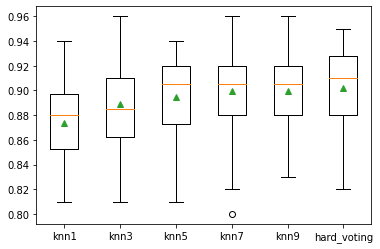

In [18]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [19]:
get_models()

{'knn1': KNeighborsClassifier(n_neighbors=1),
 'knn3': KNeighborsClassifier(n_neighbors=3),
 'knn5': KNeighborsClassifier(),
 'knn7': KNeighborsClassifier(n_neighbors=7),
 'knn9': KNeighborsClassifier(n_neighbors=9),
 'hard_voting': VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=1)),
                              ('knn3', KNeighborsClassifier(n_neighbors=3)),
                              ('knn5', KNeighborsClassifier()),
                              ('knn7', KNeighborsClassifier(n_neighbors=7)),
                              ('knn9', KNeighborsClassifier(n_neighbors=9))])}

# Blending of Ensemble

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.825 (0.040)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


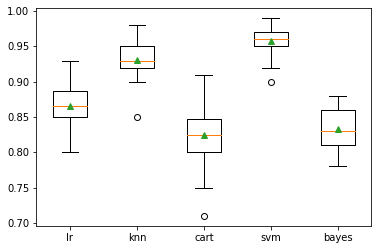

In [7]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, random_state=1)
    return X, y
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [6]:
X.shape
y.shape

(1000,)

# Stacking of Models

In [8]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [14]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y


In [16]:
# get a stacking ensemble of models
def get_stacking():
    #define the base models
    level0=list()
    level0.append(('lr',LogisticRegression()))
    level0.append(('knn',KNeighborsClassifier()))
    level0.append(('cart',DecisionTreeClassifier()))
    level0.append(('svm',SVC()))
    level0.append(('bayes',GaussianNB()))
    #define meta learner model
    level1=LogisticRegression()
    #define the stacking ensemble
    model=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [17]:
#get a list of models to evaluae
def get_models():
    models=dict()
    models['lr']=LogisticRegression()
    models['knn']=KNeighborsClassifier()
    models['cart']=DecisionTreeClassifier()
    models['svm']=SVC()
    models['bayes']=GaussianNB()
    models['stacking']=get_stacking()
    return models

def evaluate_model(model, X, y):
    #define the evaluatioin precedure
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #evaluate the model and collect the results
    scores=cross_val_score(model, X, y, scoring='accuracy',cv=cv, n_jobs=-1)
    return scores

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.825 (0.041)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.018)


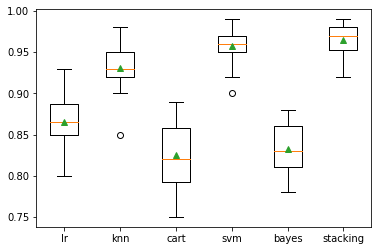

In [18]:
#define dataset
X, y=get_dataset()
models=get_models()
results,names=list(),list()
for name, model in models.items():
    #evaluate the model
    scores=evaluate_model(model, X, y)
    #score the results
    results.append(scores)
    names.append(name)
    #summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores),std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()